In [18]:
# Let's start with installing the required Python libraries
!pip install pandas
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 
#It enables the inline plotting feature, which displays the plots directly in the notebook interface
import math
import sklearn 

In [19]:
import warnings
warnings.filterwarnings("ignore") # Suppressing warning messages 

In [20]:
titanic = pd.read_csv("C:\\Users\\Gebruiker\\Downloads\\archive\\Titanic-Dataset.csv")

In [21]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [22]:
# Number of passengers travelling in the ship
print("Number of passengers are",len(titanic))

Number of passengers are 891


In [23]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [24]:
# Check for duplicate data
titanic.duplicated().sum()

0

In [25]:
# Check for missing values
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [26]:
# Age, Cabin and Embarked columns have missing values
# Check the percentage of missing data
titanic.isnull().mean()*100

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [27]:
# Drop the Cabin column because it has more than 75% of missing value
titanic.drop("Cabin", axis=1, inplace=True) 
# 'axis=1'= I want to drop a column, 0 for rows.
# 'inplace=True'= The original DataFrame is altered rather than returning a new DataFrame

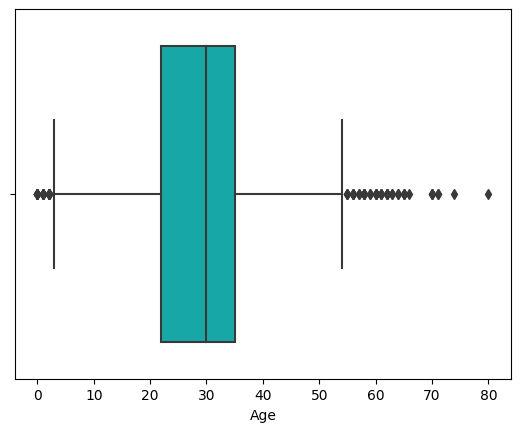

In [57]:
# Imput missing values in age column
sns.boxplot(x=titanic.Age, color='c')
plt.show()

In [ ]:
# the boxplot is showing more than 65 values are outliers but the age should be near 80 so it should be ok

In [35]:
titanic.Age.mean()

29.69911764705882

In [36]:
# Imput the Age NaN values with mean(30)
titanic.Age = titanic.Age.replace({np.nan:30})

In [37]:
titanic.Age.head() 

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
Name: Age, dtype: float64

In [38]:
titanic.Age.isnull().sum()

0

In [40]:
titanic.Age = titanic.Age.astype(np.int64) # It is in float type so converting to integer
titanic.Age.dtype

dtype('int64')

In [42]:
# Imput the missing values of Embarked column. The column is object so I will replace NaN values with mode
titanic.Embarked.value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [43]:
titanic.Embarked = titanic.Embarked.replace({np.nan:"S"})

In [44]:
titanic.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [67]:
# Let's separate the columns of the DataFrame 'titanic' into numeric and categorical columns.
numeric = []
categ = []
for i in titanic.columns:
    if titanic[i].dtype =="int64" or titanic[i].dtype =="float64":
        numeric.append(i)
    else:
        categ.append(i)

In [68]:
numeric

['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [69]:
categ

['Name', 'Ticket', 'Embarked']

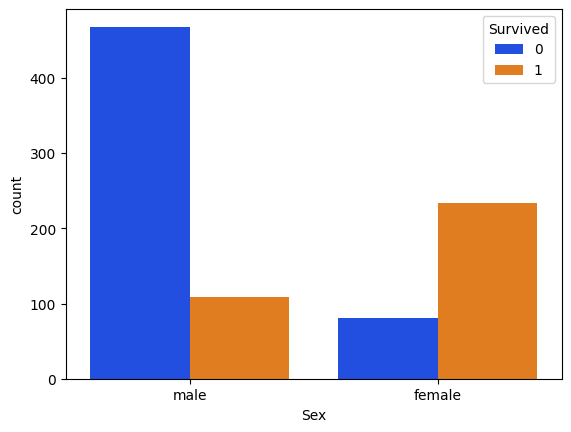

In [58]:
sns.countplot(x="Sex", hue="Survived", data=titanic, palette='bright')
plt.show() # more females are survived compare to male

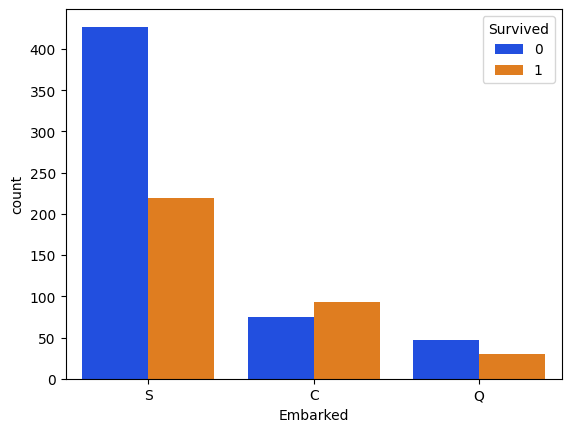

In [51]:
sns.countplot(x="Embarked", hue="Survived", data=titanic , palette='bright')
plt.show() # most of the passengers are ported from S

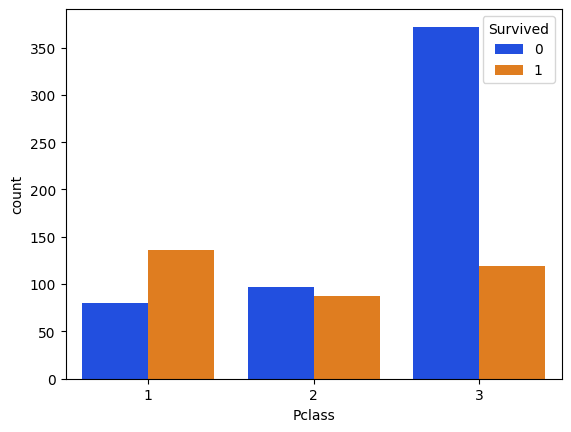

In [59]:
sns.countplot(x="Pclass", hue="Survived", data=titanic , palette='bright')
plt.show() 
# passenger of class 1 are survived more than other class
# passengers who are not survived are majorly from class 3

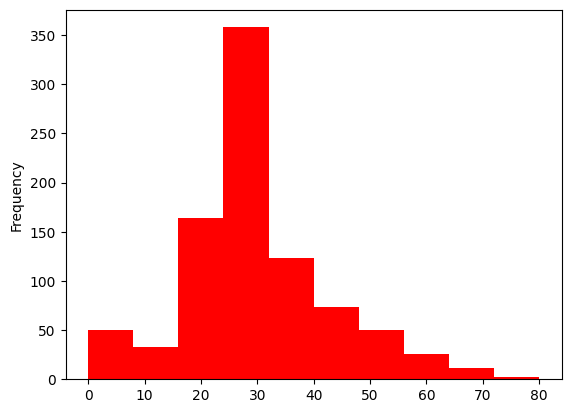

In [65]:
titanic.Age.plot.hist(color='red')
plt.show()
# most of the passengers are having age between 20 to 40

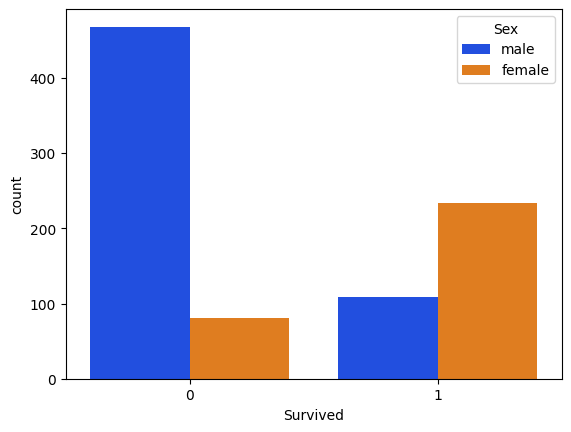

In [68]:
sns.countplot(x="Survived", hue="Sex", data=titanic, palette='bright')
plt.show() # In surving females get more weightage than males

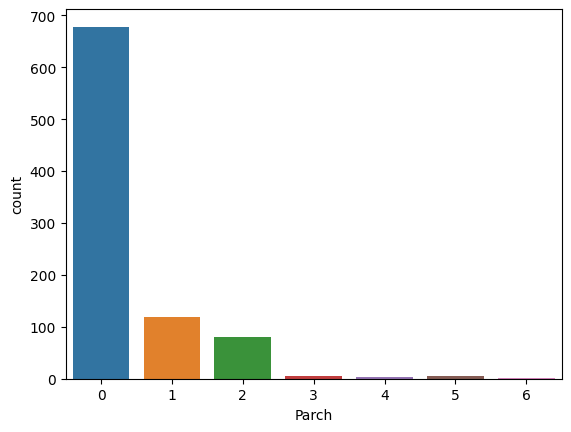

In [75]:
parch_order = titanic['Parch'].value_counts().sort_index(ascending=True).index
sns.countplot(x="Parch", data=titanic, order=parch_order)
plt.show() 
# Parch = Number of Parents/Children Aboard
# Most of them are without any children or parents

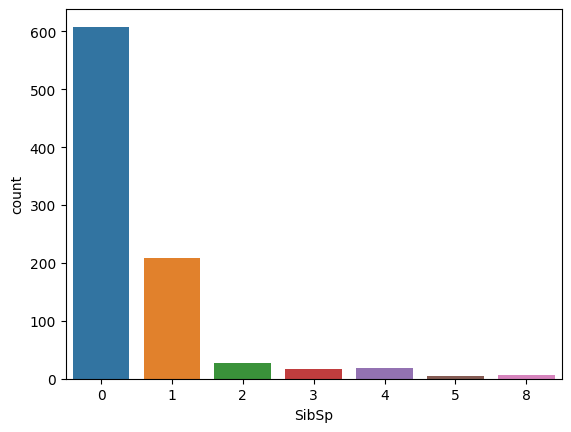

In [76]:
parch_order = titanic['SibSp'].value_counts().sort_index(ascending=True).index
sns.countplot(x="SibSp", data=titanic, order=parch_order)
plt.show() 
# Sibsp = Number of Siblings/Spouses Aboard
# Most of them are without any siblings or spouse

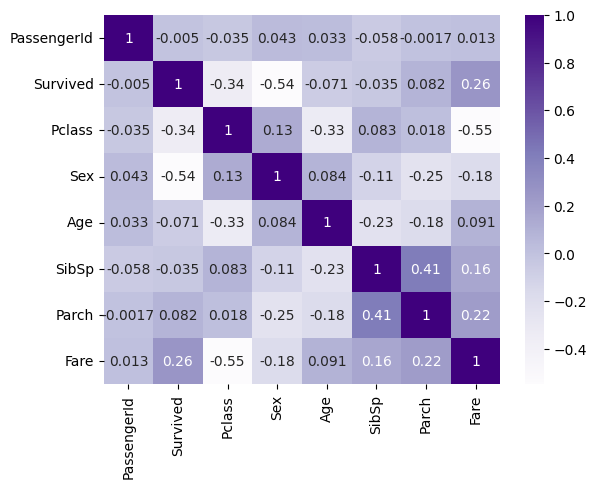

In [77]:
numeric_columns = titanic.select_dtypes(include=[np.number])
sns.heatmap(numeric_columns.corr(), annot=True, cmap="Purples")
plt.show()